# R Script

### Assignment 5.2: Heat Maps, Contour Charts and Spatial Charts

#### DSC640
Taniya Adhikari

In [60]:
library(ggplot2)
library(readxl)
library(scales)
library(plyr)
library(dplyr)
library(ggrepel)
library(reshape2)

In [32]:
install.packages(c("cowplot", "googleway", "ggplot2", "ggspatial", "libwgeom", "sf", "rnaturalearth", "rnaturalearthdata"))

Warning message:
"package 'libwgeom' is not available (for R version 3.6.3)"Warning message:
"dependency 'rjson' is not available"also installing the dependencies 'proxy', 'png', 'rgdal', 'prettymapr', 'e1071', 'wk', 'jpeg', 'jqr', 'googlePolylines', 'isoband', 'rlang', 'rosm', 'abind', 'classInt', 's2', 'units', 'sp'




  There are binary versions available but the source versions are later:
           binary source needs_compilation
proxy      0.4-25 0.4-26              TRUE
rgdal      1.5-23 1.5-28              TRUE
e1071       1.7-6  1.7-9              TRUE
wk          0.4.1  0.6.0              TRUE
jpeg      0.1-8.1  0.1-9              TRUE
jqr         1.2.1  1.2.2              TRUE
isoband     0.2.4  0.2.5              TRUE
rlang      0.4.11  1.0.2              TRUE
s2          1.0.4  1.0.7              TRUE
units       0.7-1  0.8-0              TRUE
sp          1.4-5  1.4-6              TRUE
googleway   2.7.3  2.7.6             FALSE
ggplot2     3.3.3  3.3.5             FALSE
sf          0.9-8  1.0-6              TRUE

  Binaries will be installed


Warning message:
"package 'ggrepel' is in use and will not be installed"

package 'proxy' successfully unpacked and MD5 sums checked
package 'png' successfully unpacked and MD5 sums checked
package 'rgdal' successfully unpacked and MD5 sums checked
package 'prettymapr' successfully unpacked and MD5 sums checked
package 'e1071' successfully unpacked and MD5 sums checked
package 'wk' successfully unpacked and MD5 sums checked
package 'jpeg' successfully unpacked and MD5 sums checked
package 'jqr' successfully unpacked and MD5 sums checked
package 'googlePolylines' successfully unpacked and MD5 sums checked
package 'isoband' successfully unpacked and MD5 sums checked
package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\bibek\anaconda3\envs\r-environment\Lib\R\library\00LOCK\rlang\libs\x64\rlang.dll to C:\Users\bibek\anaconda3\envs\r-environment\Lib\R\library\rlang\libs\x64\rlang.dll: Permission denied"Warning message:
"restored 'rlang'"

package 'rosm' successfully unpacked and MD5 sums checked
package 'abind' successfully unpacked and MD5 sums checked
package 'classInt' successfully unpacked and MD5 sums checked
package 's2' successfully unpacked and MD5 sums checked
package 'units' successfully unpacked and MD5 sums checked
package 'sp' successfully unpacked and MD5 sums checked
package 'cowplot' successfully unpacked and MD5 sums checked
package 'ggspatial' successfully unpacked and MD5 sums checked
package 'sf' successfully unpacked and MD5 sums checked
package 'rnaturalearth' successfully unpacked and MD5 sums checked
package 'rnaturalearthdata' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\bibek\AppData\Local\Temp\RtmpWkZbZx\downloaded_packages


installing the source packages 'googleway', 'ggplot2'

Warning message in install.packages(c("cowplot", "googleway", "ggplot2", "ggrepel", :
"installation of package 'googleway' had non-zero exit status"Warning message in install.packages(c("cowplot", "googleway", "ggplot2", "ggrepel", :
"installation of package 'ggplot2' had non-zero exit status"

In [42]:
install.packages("rgeos")


  There is a binary version available but the source version is later:
      binary source needs_compilation
rgeos  0.5-5  0.5-9              TRUE

  Binaries will be installed
package 'rgeos' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\bibek\AppData\Local\Temp\RtmpWkZbZx\downloaded_packages


In [10]:
df <- read.csv("ppg2008.csv")
df2 <- cor(select(df, -'Name'))
df3 <- melt(df2)

In [11]:
head(df3)

Var1,Var2,value
G,G,1.00000000
MIN,G,0.18686608
PTS,G,0.06309908
FGM,G,0.03992195
FGA,G,-0.05958051
FGP,G,0.18087541


### R - HeatMap

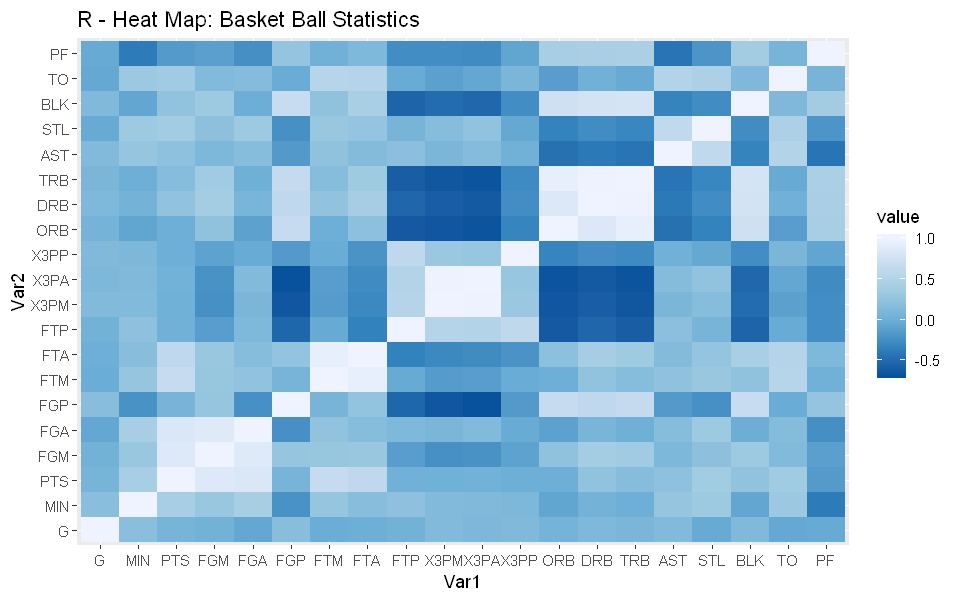

In [16]:
options(repr.plot.width =8, repr.plot.height =5)
ggplot(data = df3, aes(x=Var1, y=Var2, fill=value)) + 
geom_tile() + 
scale_fill_distiller(palette="Blues")+
  ggtitle("R - Heat Map: Basket Ball Statistics")


### R - Spatial Charts

In [43]:
library("rnaturalearth")
library("rnaturalearthdata")
library("sf")
library("rgeos")

Loading required package: sp
rgeos version: 0.5-5, (SVN revision 640)
 GEOS runtime version: 3.8.0-CAPI-1.13.1 
 Linking to sp version: 1.4-5 
 Polygon checking: TRUE 



In [44]:
df <- read.csv("costcos-geocoded.csv")

In [45]:
world <- ne_countries(scale = "medium", returnclass = "sf")

In [46]:
counts <- df %>% count(df$State)
names(counts) <- c('region','count')
counts$region <- tolower(counts$region)

In [47]:
MainStates <- map_data("state")

In [48]:
MergedStates <-  inner_join(MainStates, counts, by = "region")

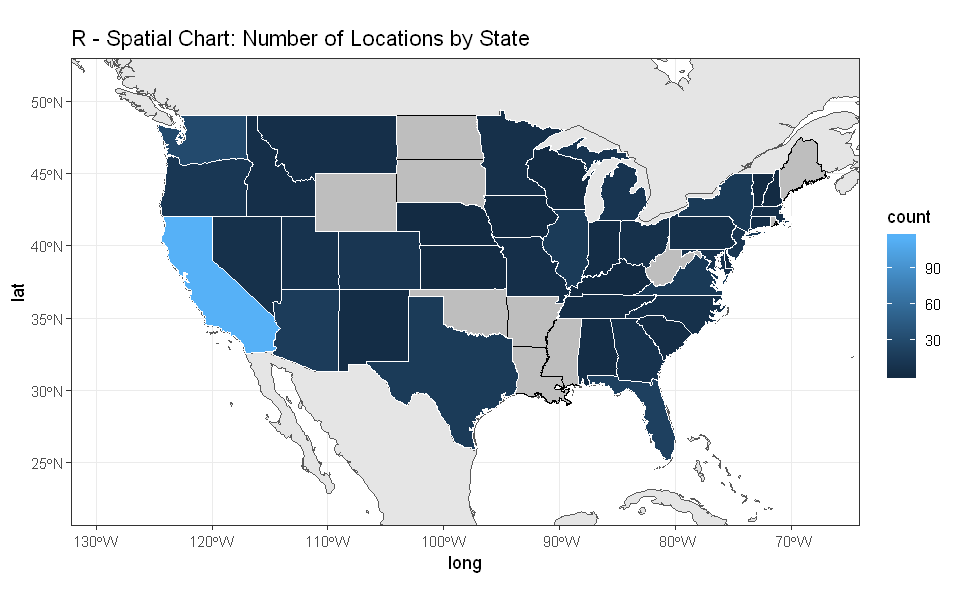

In [51]:
ggplot() +
geom_sf(data = world) + 
geom_polygon( data=MainStates, aes(x=long, y=lat, group=group),
                color="black", fill="gray")+
coord_sf(xlim = c(-132.15, -64.12), ylim = c(20.65, 52.97), expand = FALSE) +
geom_polygon(data=MergedStates, 
          aes(x=long, y=lat, group=group, fill = count), 
          color="white", size = 0.2) +  
theme_bw() +ggtitle("R - Spatial Chart: Number of Locations by State")


### R - Contour Charts

In [ ]:
#install.packages("MASS")

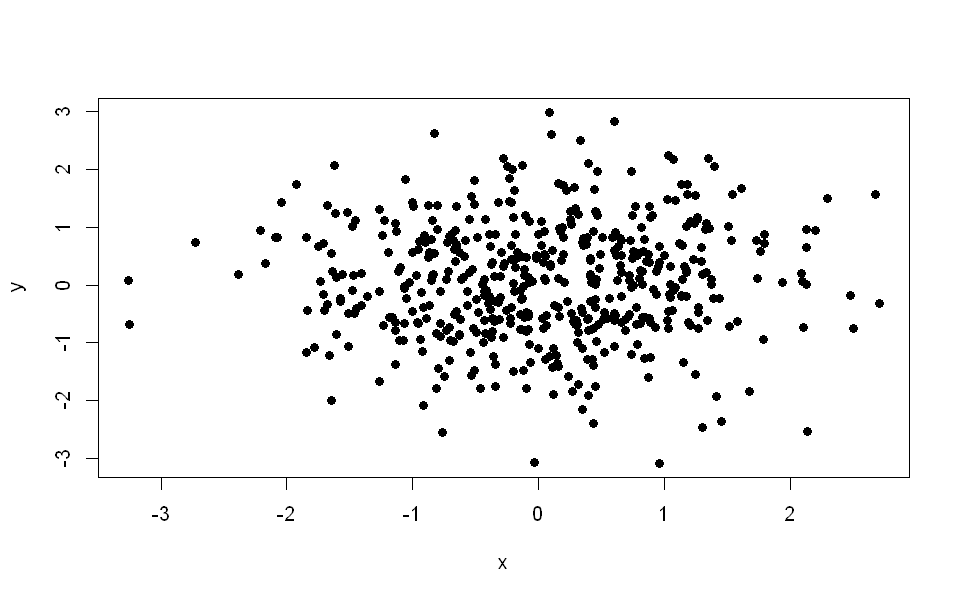

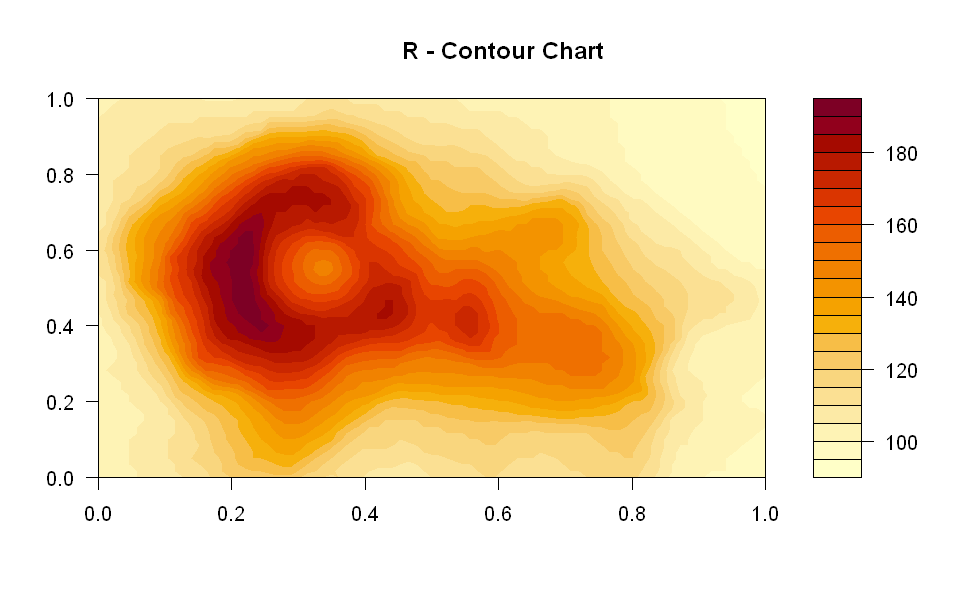

In [72]:
library(MASS)

# Data
x <- rnorm(500)
y <- rnorm(500)
z <- kde2d(x, y, n = 50)

plot(x, y, pch = 19)


filled.contour(volcano)
title("R - Contour Chart")